# Challenge 3 - Yellow Taxi Journeys 2018-2020
> From 2018-2020, in which hour of the day window was there the most recorded demand for yellow taxis? <br>
> Which yellow taxi zones have the best tippers? <br>
> Can you show a choropleth for tipping? <br>
> For data that has been collected, has the COVID-19 outbreak impacted yellow taxi demand? <br>

In [0]:
%sql
SELECT * FROM taxi_journeys LIMIT 10

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,idx
2,2001-01-01T00:01:48.000+0000,2001-01-01T00:15:47.000+0000,1,1.35,1,N,43,170,2,9.0,0.0,0.5,0.0,0.0,0.3,9.8,null,1
2,2001-01-01T00:02:08.000+0000,2001-01-01T01:00:02.000+0000,1,0.43,1,N,151,151,1,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0,2
2,2001-01-01T00:02:26.000+0000,2001-01-01T00:04:49.000+0000,1,0.36,1,N,48,48,2,3.5,0.0,0.5,0.0,0.0,0.3,4.3,null,3
2,2001-01-01T00:05:12.000+0000,2001-01-01T00:09:59.000+0000,1,0.62,1,N,140,229,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8,null,4
2,2001-01-01T00:06:42.000+0000,2001-01-01T16:53:11.000+0000,1,0.92,1,N,141,236,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8,null,5
2,2001-01-01T00:07:04.000+0000,2001-01-01T00:07:30.000+0000,1,0.11,1,N,48,163,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,null,6
2,2001-01-01T00:09:39.000+0000,2001-01-01T06:39:54.000+0000,1,3.22,1,N,48,148,2,13.5,0.0,0.5,0.0,0.0,0.3,16.8,2.5,7
2,2001-01-01T00:13:42.000+0000,2001-01-01T00:22:17.000+0000,1,0.8,1,N,170,161,2,5.5,0.0,0.5,0.0,0.0,0.3,6.3,null,8
2,2001-01-01T22:55:43.000+0000,2001-01-02T00:05:43.000+0000,1,4.67,1,N,234,162,2,31.5,0.0,0.5,0.0,0.0,0.3,32.3,null,9
2,2001-01-05T11:45:23.000+0000,2001-01-05T11:52:05.000+0000,5,1.53,1,N,71,89,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,null,10


> From 2018-2020, in which hour of the day window was there the most recorded demand for yellow taxis? <br>

In [0]:
%sql DROP TABLE IF EXISTS count_per_min

In [0]:
%sql 
CREATE TEMPORARY VIEW count_per_min AS (
  SELECT COUNT(1) as num, MINUTE(tpep_pickup_datetime) + 60 * HOUR(tpep_pickup_datetime) as minute_of_day
  FROM taxi_journeys
  GROUP BY MINUTE(tpep_pickup_datetime) + 60 * HOUR(tpep_pickup_datetime)
)


In [0]:
%sql
SELECT * FROM count_per_min

num,minute_of_day
177766,1342
148187,471
50502,148
144181,463
151426,496
183808,833
220473,1088
187648,1238
186905,858
188091,1025


In [0]:
%sql
DROP TABLE IF EXISTS frequency_over_hour

In [0]:
%sql
CREATE TEMPORARY VIEW frequency_over_hour AS (
  SELECT i.minute_of_day as window_start, SUM(o.num) as frequency
  FROM COUNT_PER_MIN i, COUNT_PER_MIN o
  WHERE o.minute_of_day >= i.minute_of_day AND o.minute_of_day <= i.minute_of_day + 60
  OR o.minute_of_day <= i.minute_of_day - (23 * 60)  -- considering 2300-2359
  GROUP BY i.minute_of_day
)

Out[1]:

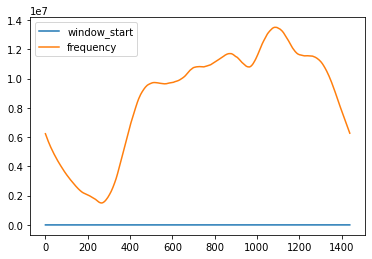

<matplotlib.axes._subplots.AxesSubplot at 0x7fe70c09c040>

In [0]:
freq_pd = spark.sql('select * from frequency_over_hour ORDER BY window_start').toPandas()
freq_pd.plot()

In [0]:
import math
busiest_start = spark.sql('select window_start from frequency_over_hour ORDER BY frequency DESC LIMIT 1').collect()[0][0]
'busiest start: {0}:{1}'.format(str(math.floor(busiest_start / 60)), str(busiest_start - math.floor(busiest_start / 60) * 60).zfill(2))

Out[2]: 'busiest start: 18:06'